Developer: Dr. Pankaj Kumar

pkumar.vt@gmail.com

In [1]:
import torch
import torch.nn as nn
from torch.optim import Adam
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
import matplotlib.pyplot as plt
from tqdm import tqdm
import sys
import os

from helper import read_user_input

In [2]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"device: {device}")

device: cuda


In [3]:
user_input = read_user_input()
batch_size = user_input['batch_size']
lr = user_input['lr']
step_2_save_output = user_input['step_2_save_output']
num_epochs = user_input['num_epochs']

In [4]:
data_folder_path = "data"
if not os.path.exists(data_folder_path):
    os.makedirs(data_folder_path)

In [5]:
def plot_data(images):
    plt.figure(figsize=(9, 2))
    plt.gray()
    images = images.detach().numpy()
    for i, item in enumerate(images[:9]):
        plt.subplot(2, 9, i+1)
        item = item.reshape(-1, 28,28) 
        plt.imshow(item[0])
    plt.pause(0.1)

In [6]:
mnist_dataset = datasets.MNIST(root='./data', train=True, download=True, transform=transforms.ToTensor())
print("Length of the MNIST dataset:", len(mnist_dataset))
#
data_loader = DataLoader(dataset = mnist_dataset, batch_size = batch_size, shuffle=False)

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 9912422/9912422 [00:25<00:00, 384002.35it/s] 


Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 28881/28881 [00:00<00:00, 113358.29it/s]


Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 1648877/1648877 [00:04<00:00, 383764.88it/s]


Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 4542/4542 [00:00<00:00, 23374881.92it/s]

Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw

Length of the MNIST dataset: 60000


In [7]:
# to check the dataset values
# for images, labels in data_loader:
#     print(len(images), torch.min(images), torch.max(images), labels.unique())

In [8]:
class Autoencoder_Linear(nn.Module):
    def __init__(self, dim = 28*28):
        super(Autoencoder_Linear, self).__init__()
        self.encoder = nn.Sequential(
            nn.Linear(dim, 256),
            nn.ReLU(),
            nn.Linear(256, 64),
            nn.ReLU(),
            nn.Linear(64, 16),
            nn.ReLU(),
            nn.Linear(16, 4),
            nn.ReLU(),
        )
        self.decoder = nn.Sequential(
            nn.Linear(4, 16),
            nn.ReLU(),
            nn.Linear(16, 64),
            nn.ReLU(),
            nn.Linear(64, 256),
            nn.ReLU(),
            nn.Linear(256, dim),
            nn.Sigmoid(),
        )

    def forward(self, x):
        return self.decoder(self.encoder(x))

In [9]:
model = Autoencoder_Linear().to(device)
criterian = nn.MSELoss()
optimizer = Adam(model.parameters(), lr = lr)

Plotting for epoch: 0, error: 0.06329695880413055


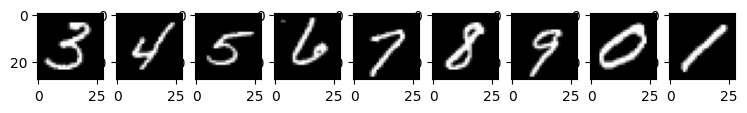

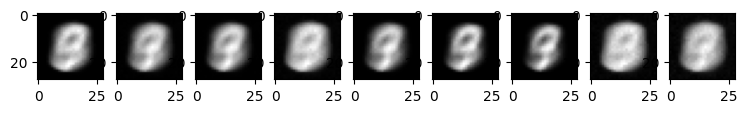

Plotting for epoch: 10, error: 0.03721781447529793


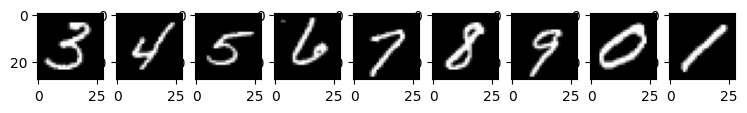

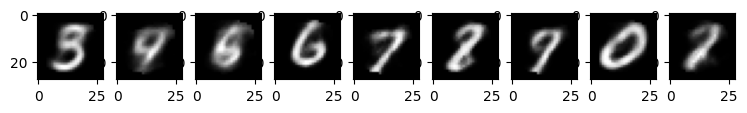

In [10]:
output_list = []
# for epoch in tqdm(range(num_epochs)):
for epoch in range(num_epochs):
    for images, labels in data_loader:
        images = images.reshape(-1, 28*28) .to(device)
        regenerated_images = model(images)
        loss = criterian(regenerated_images, images)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    if epoch % step_2_save_output == 0 or epoch == num_epochs - 1:
        # output_list.append((epoch, loss.item(), images.cpu(), regenerated_images.cpu()))
        print(f"Plotting for epoch: {epoch}, error: {loss}")
        plot_data(images.cpu())
        plot_data(regenerated_images.cpu())
